In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv",index_col = "RowNumber")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df.drop(columns = ['Surname','CustomerId'],inplace = True)

In [7]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)



In [8]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
2,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
5,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9997,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9998,709,36,7,0.00,1,0,1,42085.58,1,False,False,False


In [9]:
list= {True:1,False:0}
df['Geography_Germany']= df['Geography_Germany'].replace(list)
df['Geography_Spain']= df['Geography_Spain'].replace(list)
df['Gender_Male']= df['Gender_Male'].replace(list)

In [10]:
df 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(df.drop(columns =["Exited"]),df["Exited"],test_size = 0.2,random_state = 42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
# then add layers
model.add(Dense(11,activation = "relu",input_dim = 11)) # input layer
model.add(Dense(5,activation = "relu"))
model.add(Dense(1,activation= "sigmoid"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 5)                 60        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198 (792.00 Byte)
Trainable params: 198 (792.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss = "binary_crossentropy", optimizer = 'Adam',metrics = ['accuracy'])

In [17]:
history = model.fit(X_train_scaled ,Y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 5s 4ms/step - loss: 0.5011 - accuracy: 0.7934 - val_loss: 0.4677 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4578 - accuracy: 0.7934 - val_loss: 0.4412 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4400 - accuracy: 0.7934 - val_loss: 0.4274 - val_accuracy: 0.7987
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4285 - accuracy: 0.7934 - val_loss: 0.4179 - val_accuracy: 0.7987
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.8014 - val_loss: 0.4100 - val_accuracy: 0.8156
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4108 - accuracy: 0.8138 - val_loss: 0.4032 - val_accuracy: 0.8244
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4022 - accuracy: 0.8223 - val_loss: 0.3964 - val_accuracy: 0.8331

In [18]:
model.layers[0].get_weights()

[array([[-2.52554297e-01,  4.06652540e-01,  2.74742782e-01,
          4.42493223e-02,  1.43465608e-01,  7.02908114e-02,
         -5.00062518e-02, -4.41335440e-02, -2.34053865e-01,
          8.74429569e-02, -2.15230629e-01],
        [-2.84580499e-01, -2.91978210e-01, -6.66745082e-02,
          1.40441668e+00,  1.54124901e-01, -5.60033858e-01,
          1.00922965e-01,  7.95665011e-02,  3.10586374e-02,
          3.76669466e-01,  6.45811737e-01],
        [-1.25392377e-01, -3.22569549e-01, -3.39593798e-01,
         -3.59694242e-01, -8.31731558e-02,  5.00881970e-02,
         -7.90526718e-02, -3.41506273e-01,  8.94025639e-02,
          1.43532261e-01, -1.09058572e-03],
        [-1.29765972e-01, -2.92389184e-01, -1.11420140e-01,
          1.23717869e-02,  2.79170185e-01, -2.59740710e-01,
          2.13059351e-01, -3.25283170e-01,  2.04325747e-02,
         -1.16432175e-01, -4.10983801e-01],
        [ 7.25521706e-03, -1.20768225e+00,  8.05413537e-03,
          1.03527687e-01,  1.71344075e-02,  

In [19]:
y_log = model.predict(X_test_scaler)

63/63 [==============================] - 0s 1ms/step


In [20]:
y_pred = np.where(y_log>0.5,1,0)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
 accuracy_score(Y_test,y_pred)

0.8565

In [23]:
import matplotlib.pyplot as plt


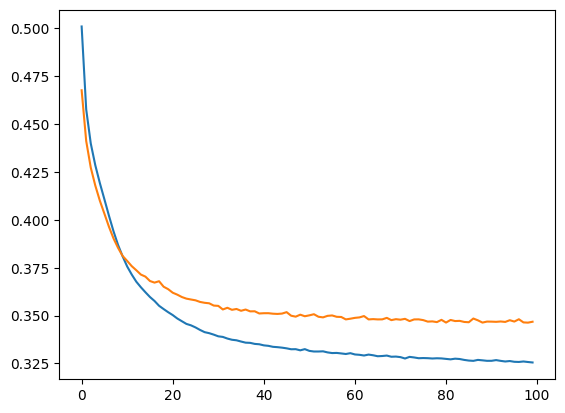

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

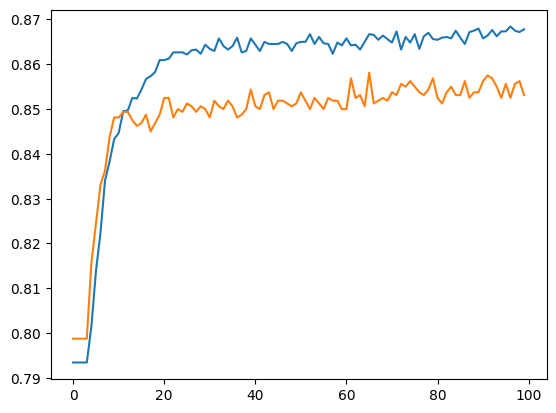

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])